In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [2]:
data = pd.read_csv("Hotel_Reviews.csv") #import dataset

In [3]:
data.head() #look at the last five reviews

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
#list all the column headers:
for i in data.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


In [5]:
len(data) #total number of reviews

515738

In [6]:
len(data.Hotel_Name.unique()) #total number of hotels being reviewed in this dataset

1492

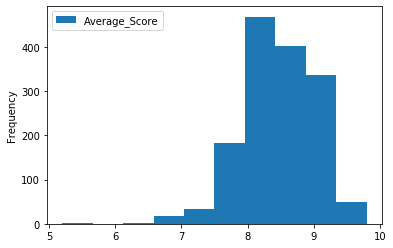

In [7]:
# plot the number of hotels versus their average rating

data_plot = data[["Hotel_Name","Average_Score"]].drop_duplicates()
data_plot_avg = data_plot.plot.hist()
plt.show()

In [ ]:
#it seems most ratings are between 7.6 and 9.2

In [8]:
max_rating = data.Average_Score.max()
max_rating

9.8

In [9]:
min_rating = data.Average_Score.min() 
min_rating

5.2

In [10]:
mean_rating = data.Average_Score.mean()
print('The mean rating is '+ str(mean_rating))

The mean rating is 8.397486902260287


In [ ]:
#The ratings are between 5.2 and 9.8, with a mean of 8.4

Natural Language Processing - Tokenize the reviews and build a bag-of-words model

The first goal is to do sentiment analysis on the positive and negative reviews. To do this, first tokenize the words using nltk, remove the stopwords, and build a bag-of-words model.

In [11]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Isaac
[nltk_data]     Sadikin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
pos_reviews = data.Positive_Review
neg_reviews = data.Negative_Review
print(type(pos_reviews))

<class 'pandas.core.series.Series'>


In [13]:
pos_reviews_words = nltk.word_tokenize(pos_reviews[1]) #word_tokenize only works for text file, not whole series
#len(pos_reviews[0])
#print(pos_reviews[1])
print(pos_reviews_words) #tokenize and print the second review (the first was too short)

['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam']


In [14]:
print(type(pos_reviews[:5]))

<class 'pandas.core.series.Series'>


In [15]:
len(pos_reviews)

515738

In [ ]:
#pos_reviews_wordslist = []  ##*Dec 15 doesn't work for bag-of-words because can't distinguish between neighbouring reviews
#for i in range(5):
#for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
#    pos_reviews_wordslist.extend(nltk.word_tokenize(pos_reviews.iloc[i])) #tokenize text in each positive review
#    return pos_reviews_wordslist

In [16]:
pos_reviews_wordslist = []  
#for i in range(5):
for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
    pos_reviews_wordslist.append(nltk.word_tokenize(pos_reviews.iloc[i])) #tokenize text in each positive review

In [17]:
print(pos_reviews_wordslist[:5])

[['Only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful'], ['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam'], 

In [18]:
len(pos_reviews_wordslist)

515738

In [19]:
type(pos_reviews_wordslist)

list

In [20]:
neg_reviews_wordslist = [] #repeat tokenization for negative reviews
#for i in range(5):
for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
    neg_reviews_wordslist.append(nltk.word_tokenize(neg_reviews.iloc[i])) #tokenize text in each negative review as alist, append that to original list
#    return pos_reviews_wordslist as a nested list with each review as a sublist

In [21]:
print(neg_reviews_wordslist[-5:])

[['no', 'trolly', 'or', 'staff', 'to', 'help', 'you', 'take', 'the', 'luggage', 'to', 'the', 'room'], ['The', 'hotel', 'looks', 'like', '3', 'but', 'surely', 'not', '4'], ['The', 'ac', 'was', 'useless', 'It', 'was', 'a', 'hot', 'week', 'in', 'vienna', 'and', 'it', 'only', 'gave', 'more', 'hot', 'air'], ['No', 'Negative'], ['I', 'was', 'in', '3rd', 'floor', 'It', 'didn', 't', 'work', 'Free', 'Wife']]


 have tokenized all the positive and negative reviews with punctuation already removed in the raw data, will remove the stop words and build a bag-of-words model with the filtered words

In [22]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Isaac
[nltk_data]     Sadikin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
len(nltk.corpus.stopwords.words("english")) #all the reviews in this dataset are in English

179

In [24]:
nltk.corpus.stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
useless_words = nltk.corpus.stopwords.words("english")
type(useless_words)

list

In [26]:
def build_bag_of_words_filtered(words):
    return {
        #word:1 for word in words
        word:1 for word in words \
        if not word in useless_words}

In [27]:
assert len(build_bag_of_words_filtered(["what", "the"]))==0, "Make sure  filtering out stopwords"

In [28]:
positive_features = None
positive_features = [
    (build_bag_of_words_filtered(review),'pos') \
    for review in pos_reviews_wordslist 
]

In [29]:
positive_features[-1]

({'staff': 1, 'kind': 1}, 'pos')

In [30]:
positive_features[-3]

({'No': 1, 'Positive': 1}, 'pos')

In [31]:
positive_features[0]

({'Only': 1, 'park': 1, 'outside': 1, 'hotel': 1, 'beautiful': 1}, 'pos')

In [32]:
type(positive_features)

list

In [33]:
negative_features = None
negative_features = [
    (build_bag_of_words_filtered(review),'neg') \
    for review in neg_reviews_wordslist 
]

In [34]:
negative_features[-2:]

[({'No': 1, 'Negative': 1}, 'neg'),
 ({'I': 1, '3rd': 1, 'floor': 1, 'It': 1, 'work': 1, 'Free': 1, 'Wife': 1},
  'neg')]

Train a classifier for sentiment analysis

use the Naive Bayes classifier ; train it on 80 percent of the data, and test on the remaining 20 percent

In [35]:
from nltk.classify import NaiveBayesClassifier

In [36]:
#Using 80% of the data for training, the rest for validation:
split = int(len(positive_features) * 0.8)
split

412590

In [37]:
classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [ ]:
#check the accuracy on the training and test sets, turning accuracy into percentage:

In [38]:
training_accuracy = None #check accuracy of training set
training_accuracy = nltk.classify.util.accuracy(classifier, positive_features[:split] + negative_features[:split])*100
training_accuracy

93.48687559078019

In [ ]:
#The training accuracy is around 93.5 percent, which is quite good, as expected since the classifier has seen the data

In [39]:
test_accuracy = None #check accuracy of test set
test_accuracy = nltk.classify.util.accuracy(classifier, positive_features[split:] + negative_features[split:])*100
test_accuracy

92.54663202388801

The test accuracy is over 92.5 percent, which is really good and almost as high as the training accuracy. It is also significantly higher for the estimated human prediction accuracy of 80%.
This shows the Naive Bayes Classifier is a good method to use for this analysis since it performs well for this type of dataset.

In [40]:
classifier.show_most_informative_features()

Most Informative Features
                Negative = 1                 neg : pos    =  22605.9 : 1.0
                Positive = 1                 pos : neg    =  11601.8 : 1.0
                   Comfy = 1                 pos : neg    =    234.6 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.5 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.7 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0


In [41]:
classifier.show_most_informative_features(50)

Most Informative Features
                Negative = 1                 neg : pos    =  22605.9 : 1.0
                Positive = 1                 pos : neg    =  11601.8 : 1.0
                   Comfy = 1                 pos : neg    =    234.6 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.5 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.7 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0
              Convenient = 1                 pos : neg    =    132.4 : 1.0
                 Helpful = 1                 pos : neg    =    125.3 : 1.0
               Excellent = 1                 pos : neg    =    121.8 : 1.0

From this list of most informative features, it's interesting to note that quite a few of the informative words from positive reviews refer to the hotel staff (Friendly, Helpful, Efficient) and location (Convenient, Conveniently, Convenience), while the most informative words for negative reviews seem to refer mostly to the facilities (Thin, Charged, Unusable, Lack, unreliable, damaged, Loud, Noisy, Smelly, Missing, loudly)

In [42]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="dark", color_codes=True)

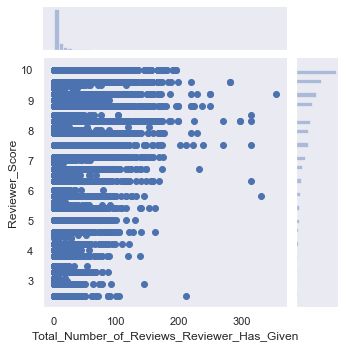

In [43]:
#sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=5)

In [44]:
sns.axes_style() #check plot style

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

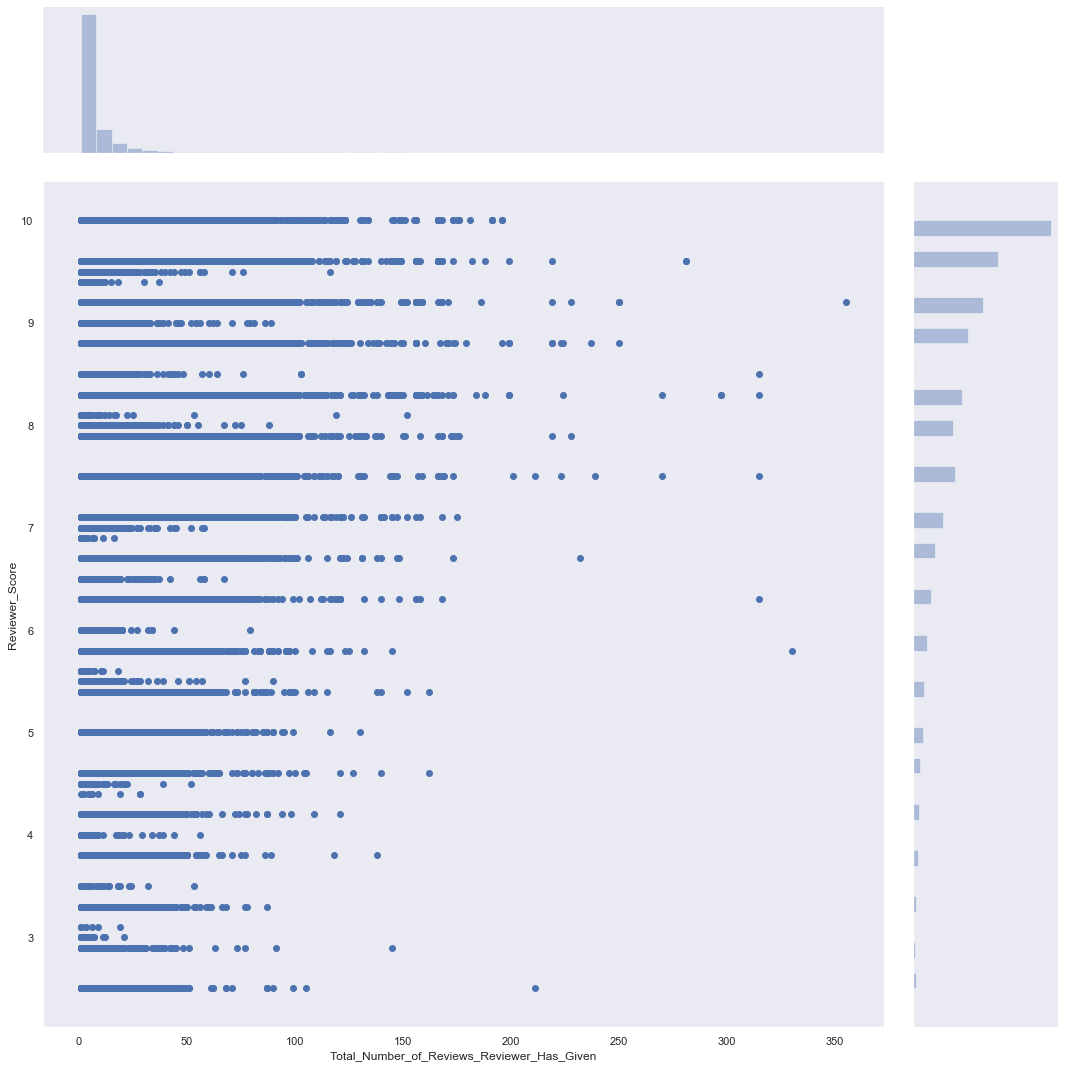

In [45]:
sns_plot=sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=15)

In [46]:
sns_plot.savefig('sns_scatter.png') #saved sns scatter plot in JupyterNotebooks folder

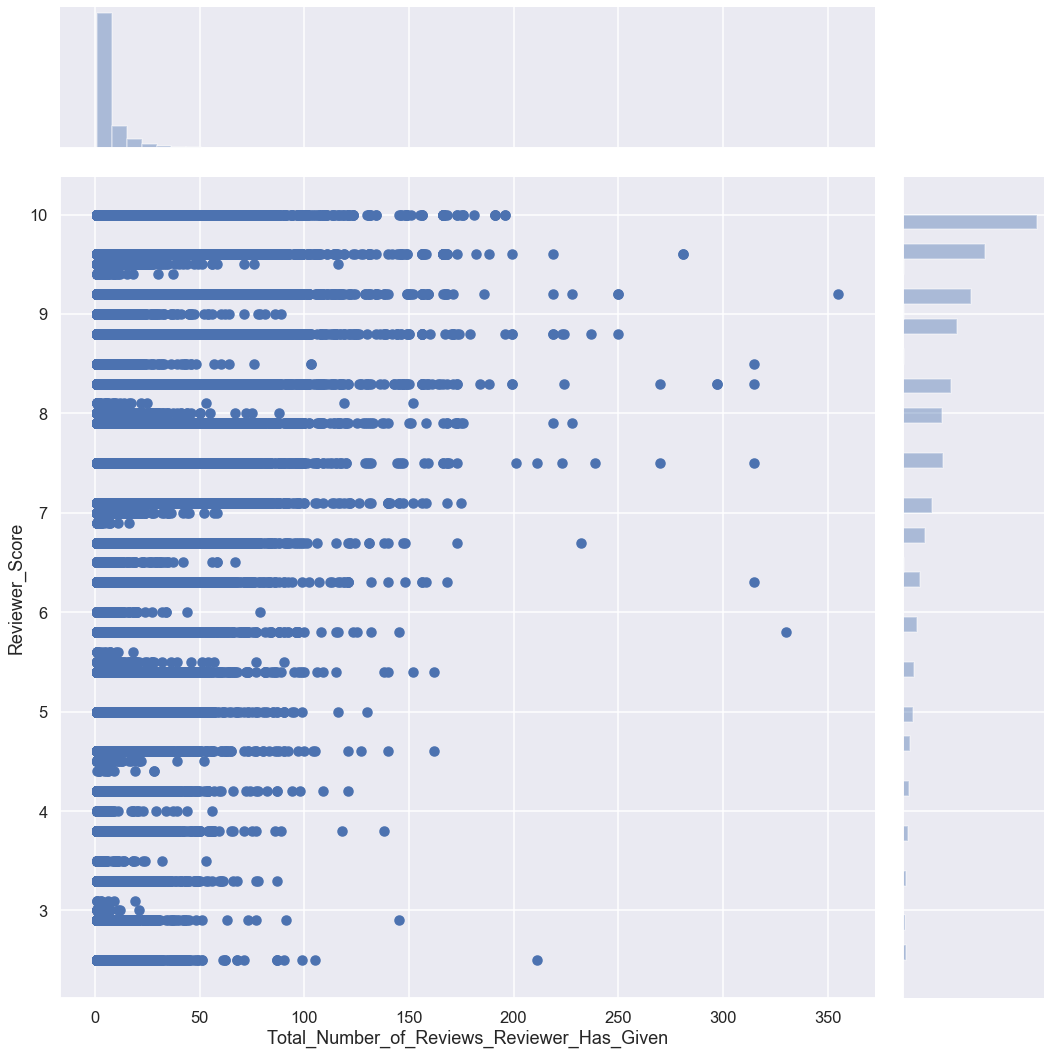

In [47]:
sns.set() #reset default parameters
sns.set_context("talk")
sns_plot=sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=15)

In [48]:
sns_plot.savefig('sns_scatter_talk.png')

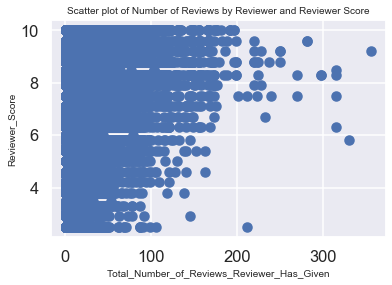

In [49]:
def plot_scatter(df, x, y):
    ### BEGIN SOLUTION
    fig, axis = plt.subplots()
    # Grid lines, Xticks, Xlabel, Ylabel
    
    axis.yaxis.grid(True)
    axis.set_title('Scatter plot of Number of Reviews by Reviewer and Reviewer Score',fontsize=10)
    axis.set_xlabel(x,fontsize=10)
    axis.set_ylabel(y,fontsize=10)


    X = df[x]
    Y = df[y]

    #axis.semilogx(X)
    axis.scatter(X, Y)
    plt.show()

plot_scatter(data, 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


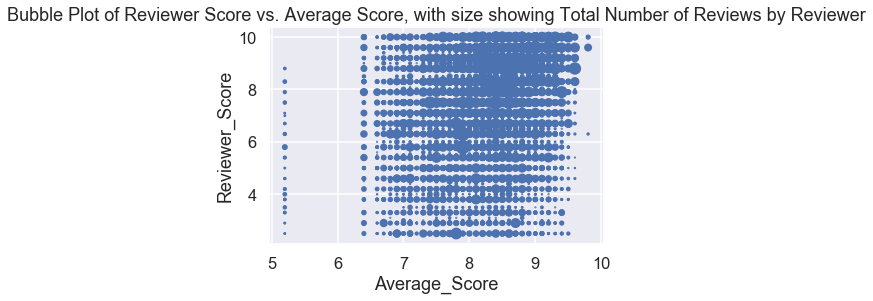

In [50]:
#scatter-bubble plot for nations :
bbplot = data.plot.scatter(x='Average_Score', y='Reviewer_Score', s=data['Total_Number_of_Reviews_Reviewer_Has_Given']*0.5, title = "Bubble Plot of Reviewer Score vs. Average Score, with size showing Total Number of Reviews by Reviewer");

In [51]:
#bubble size

max(data.Total_Number_of_Reviews_Reviewer_Has_Given.unique())

355